<a href="https://www.kaggle.com/code/surajsingh9/notebookba5357f9f9?scriptVersionId=136176099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


Load Data

In [3]:
Lr=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [4]:
Lr.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
Lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
Lr.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
Lr.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
print(Lr['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [9]:
print(Lr.loc[Lr.duplicated()])

            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  .

In [10]:
Lr.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
print(Lr['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [12]:
Lr['Hour']=Lr['Time'].apply(lambda X:int(X/3600)%24)

In [13]:
Lr['Hour']

0          0
1          0
2          0
3          0
4          0
          ..
284802    23
284803    23
284804    23
284805    23
284806    23
Name: Hour, Length: 284807, dtype: int64

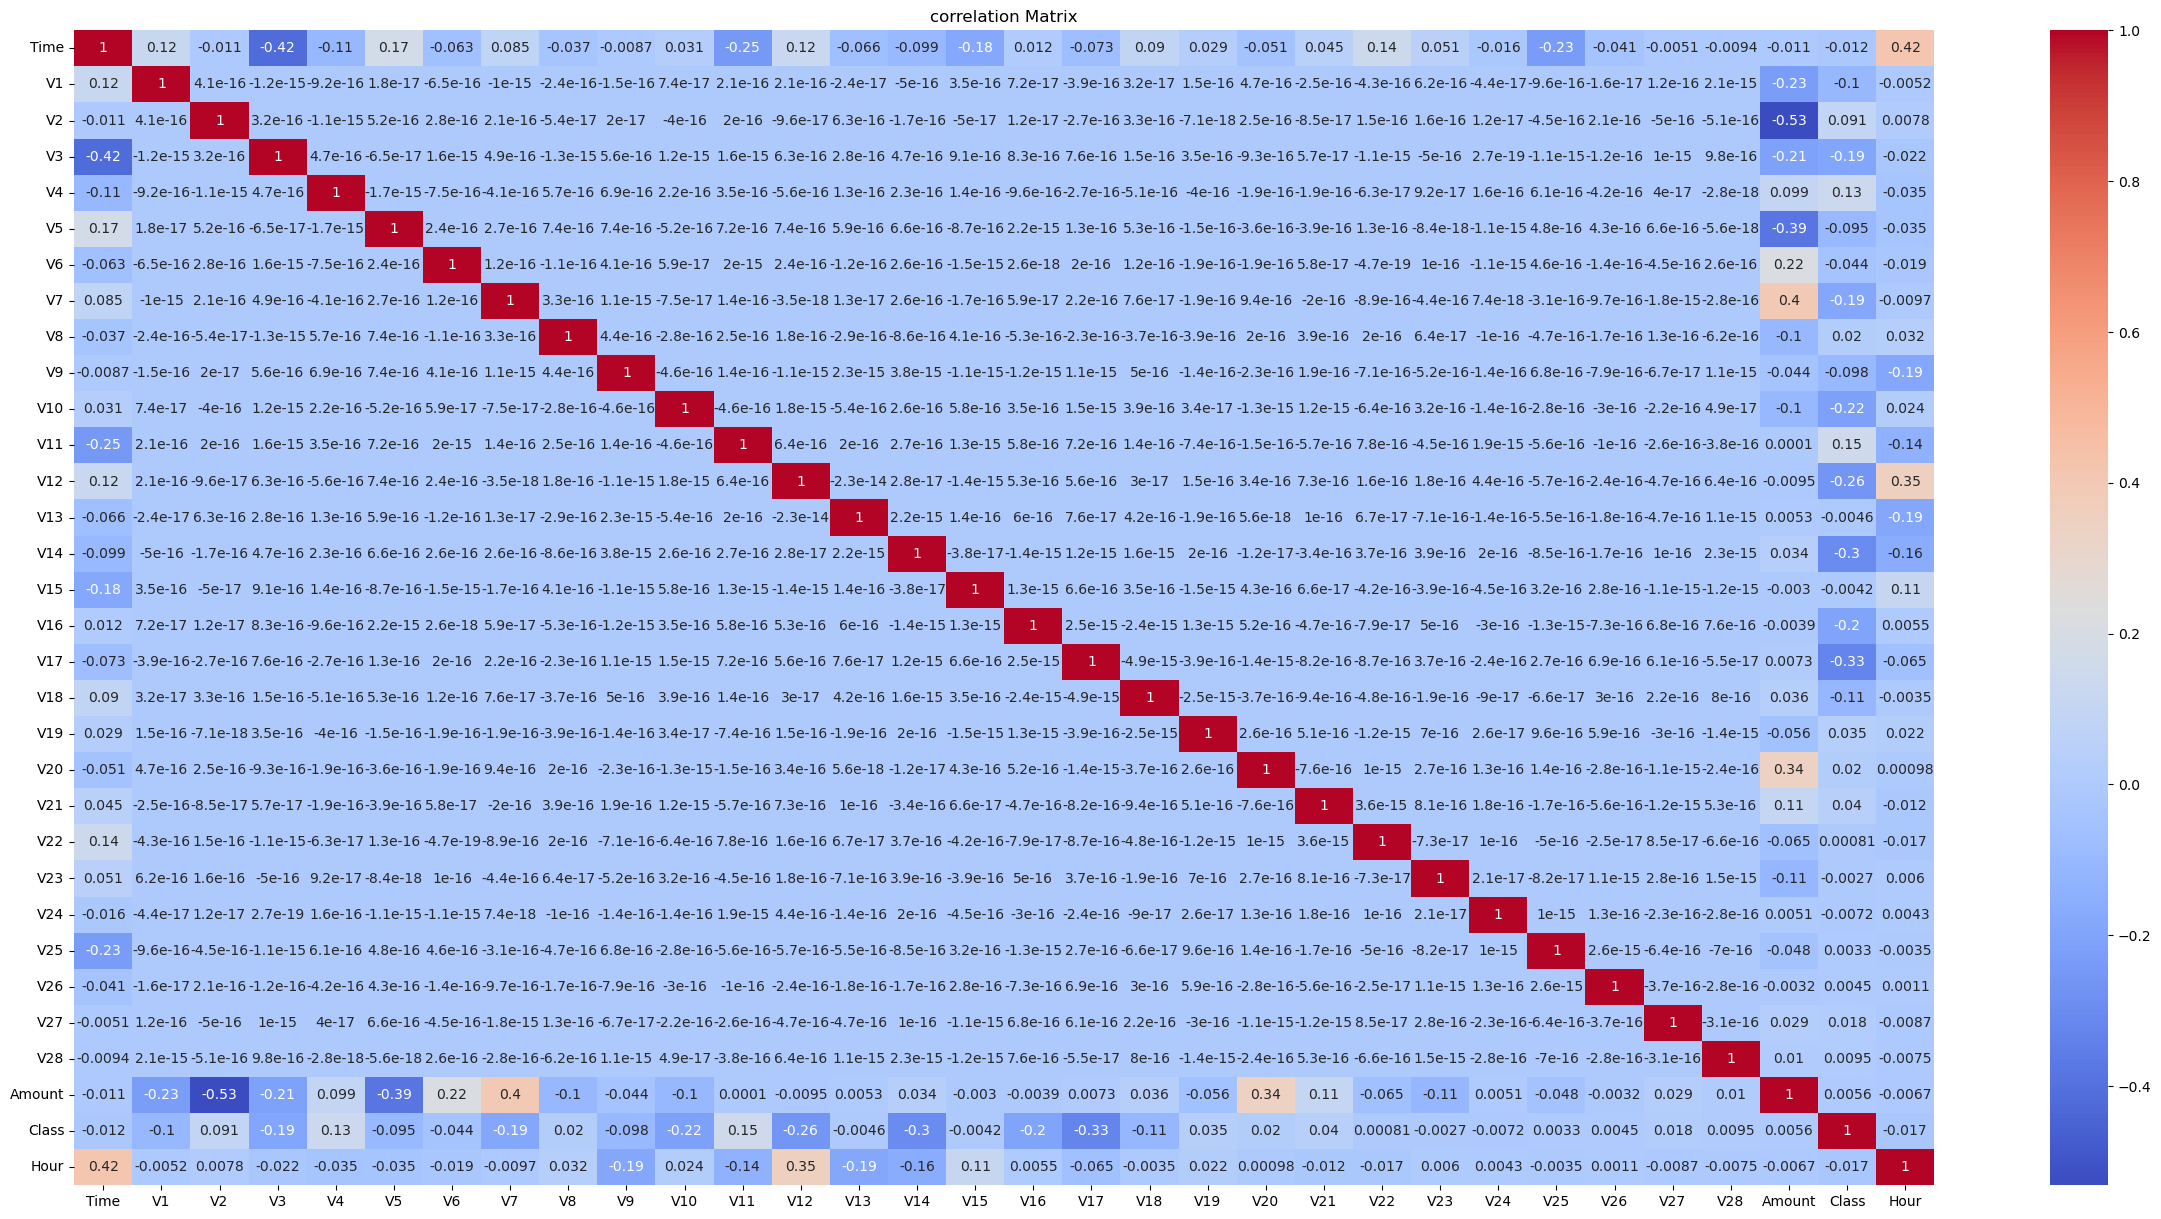

In [14]:
plt.figure(figsize=(30,15))
sns.heatmap(Lr.corr(),annot=True,cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

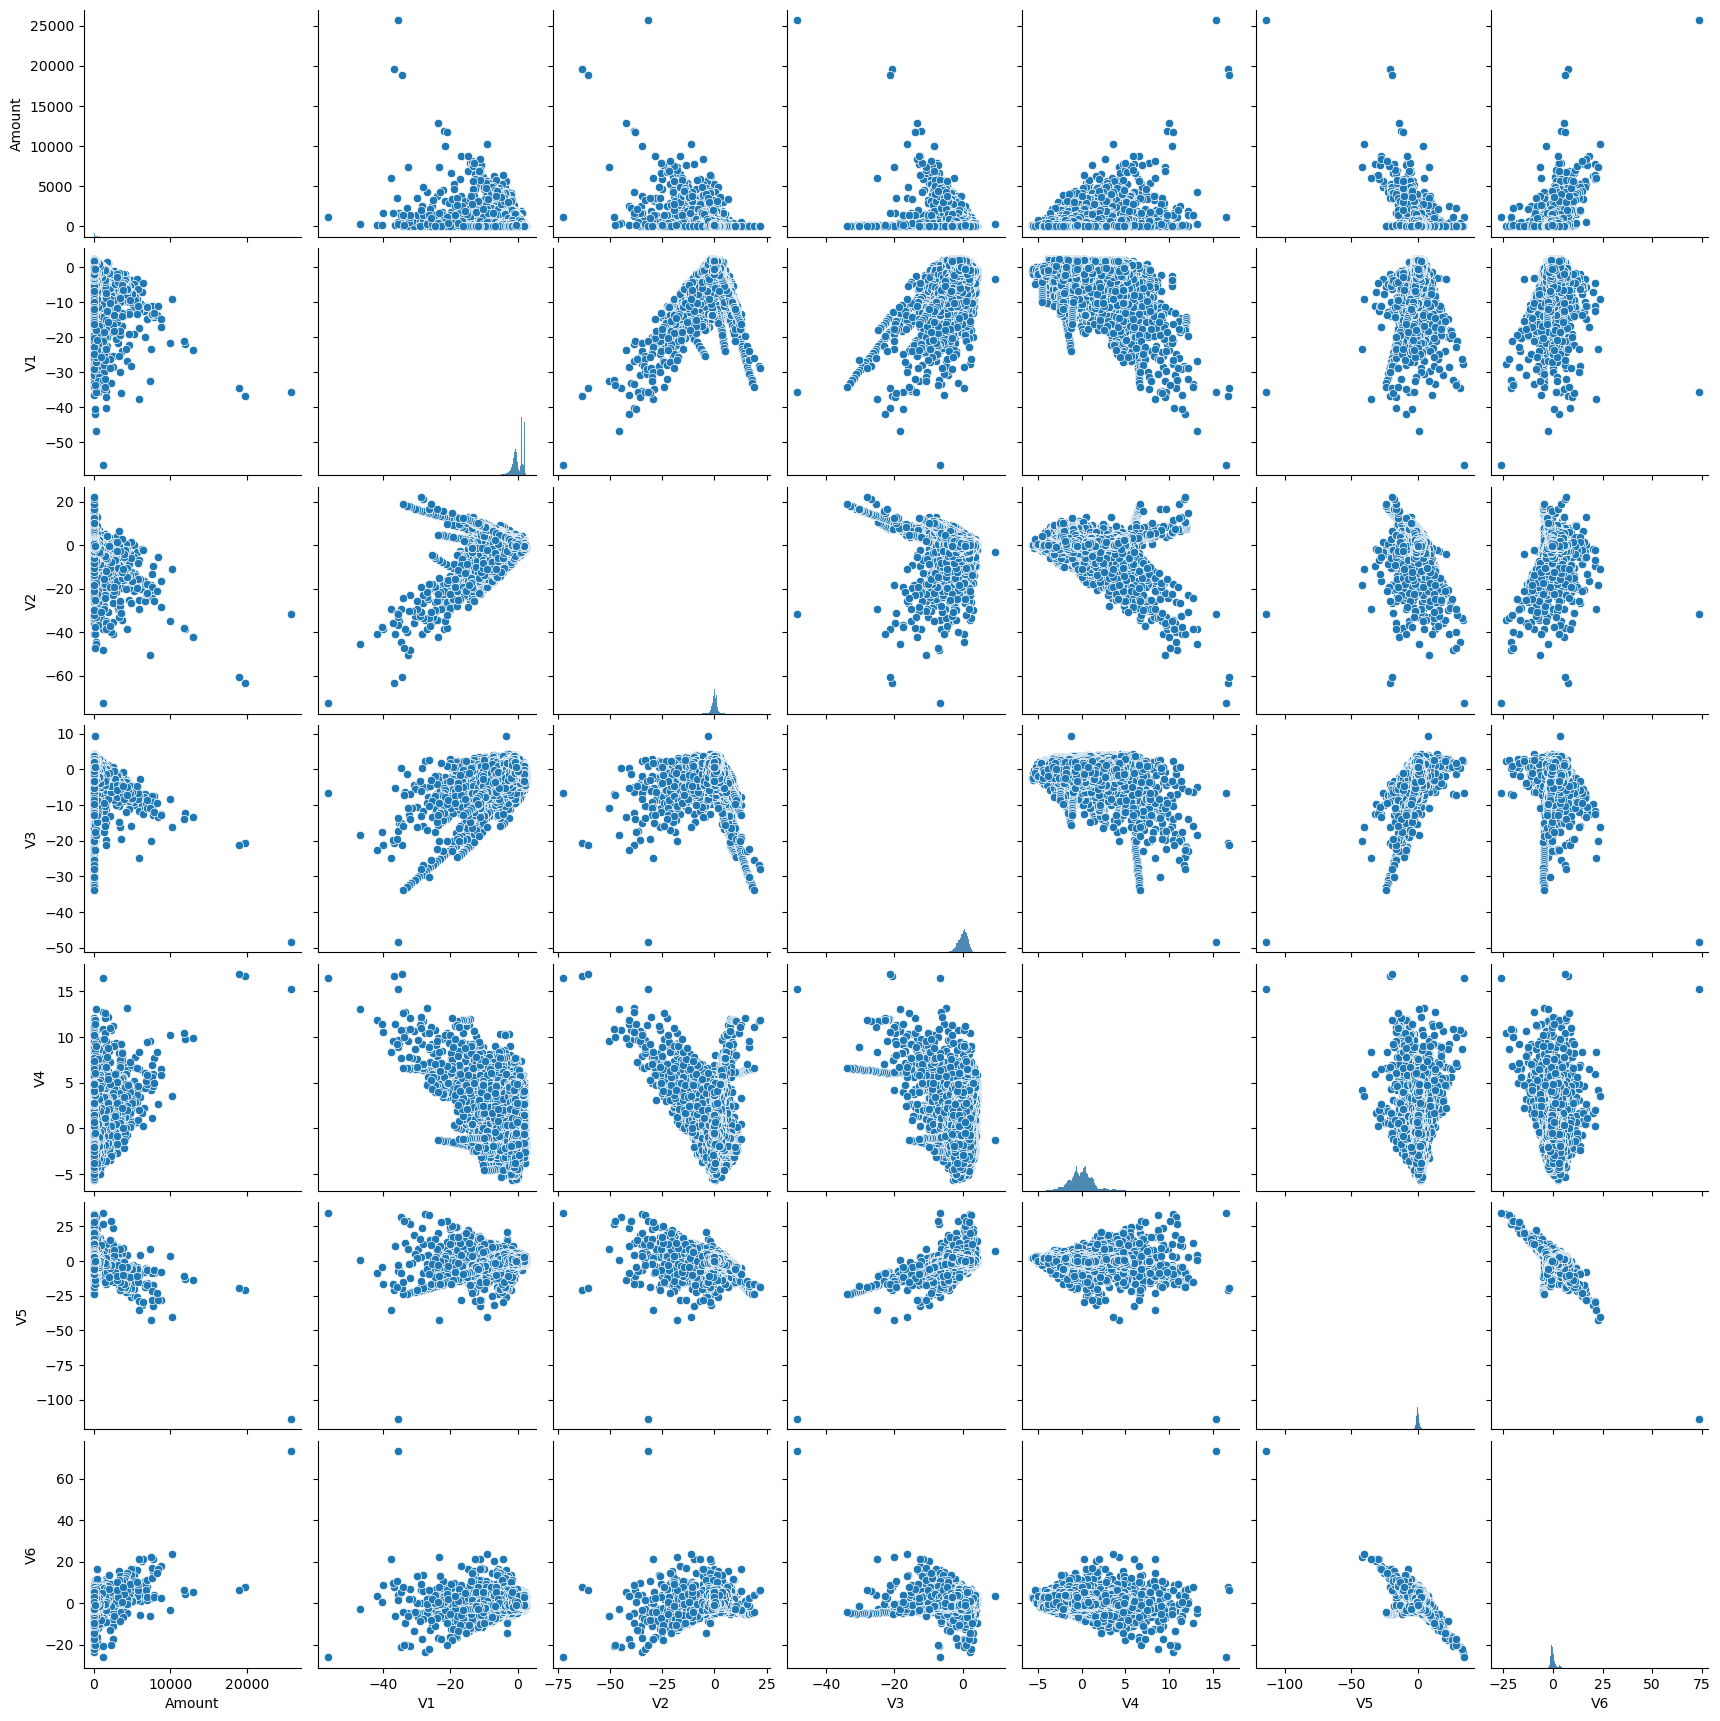

In [15]:
sns.pairplot(Lr[['Amount','V1', 'V2', 'V3', 'V4', 'V5', 'V6']])

Correlation Matrix

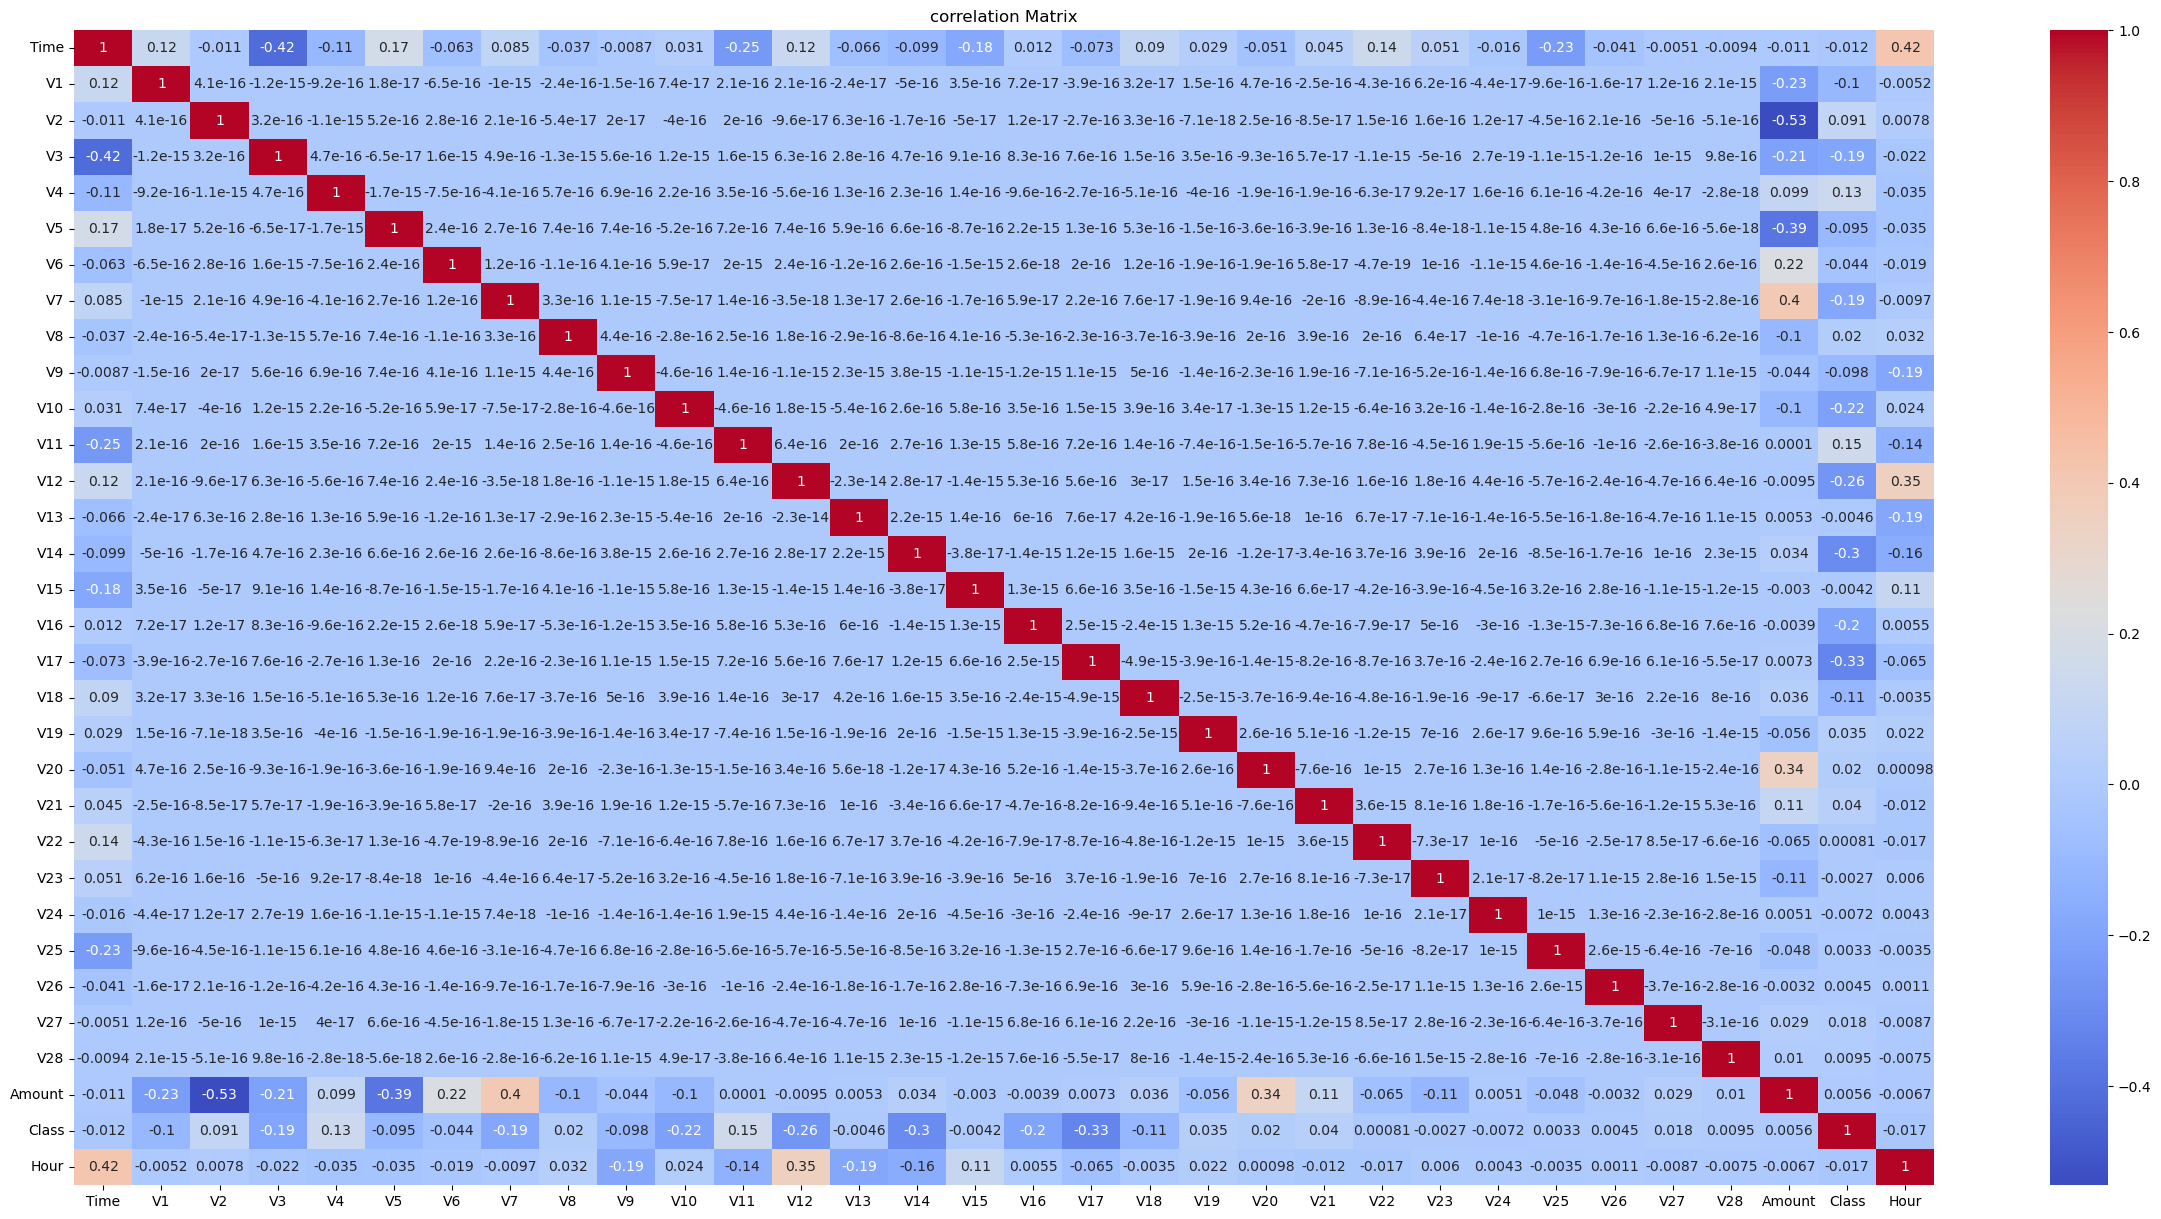

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(Lr.corr(),annot=True,cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

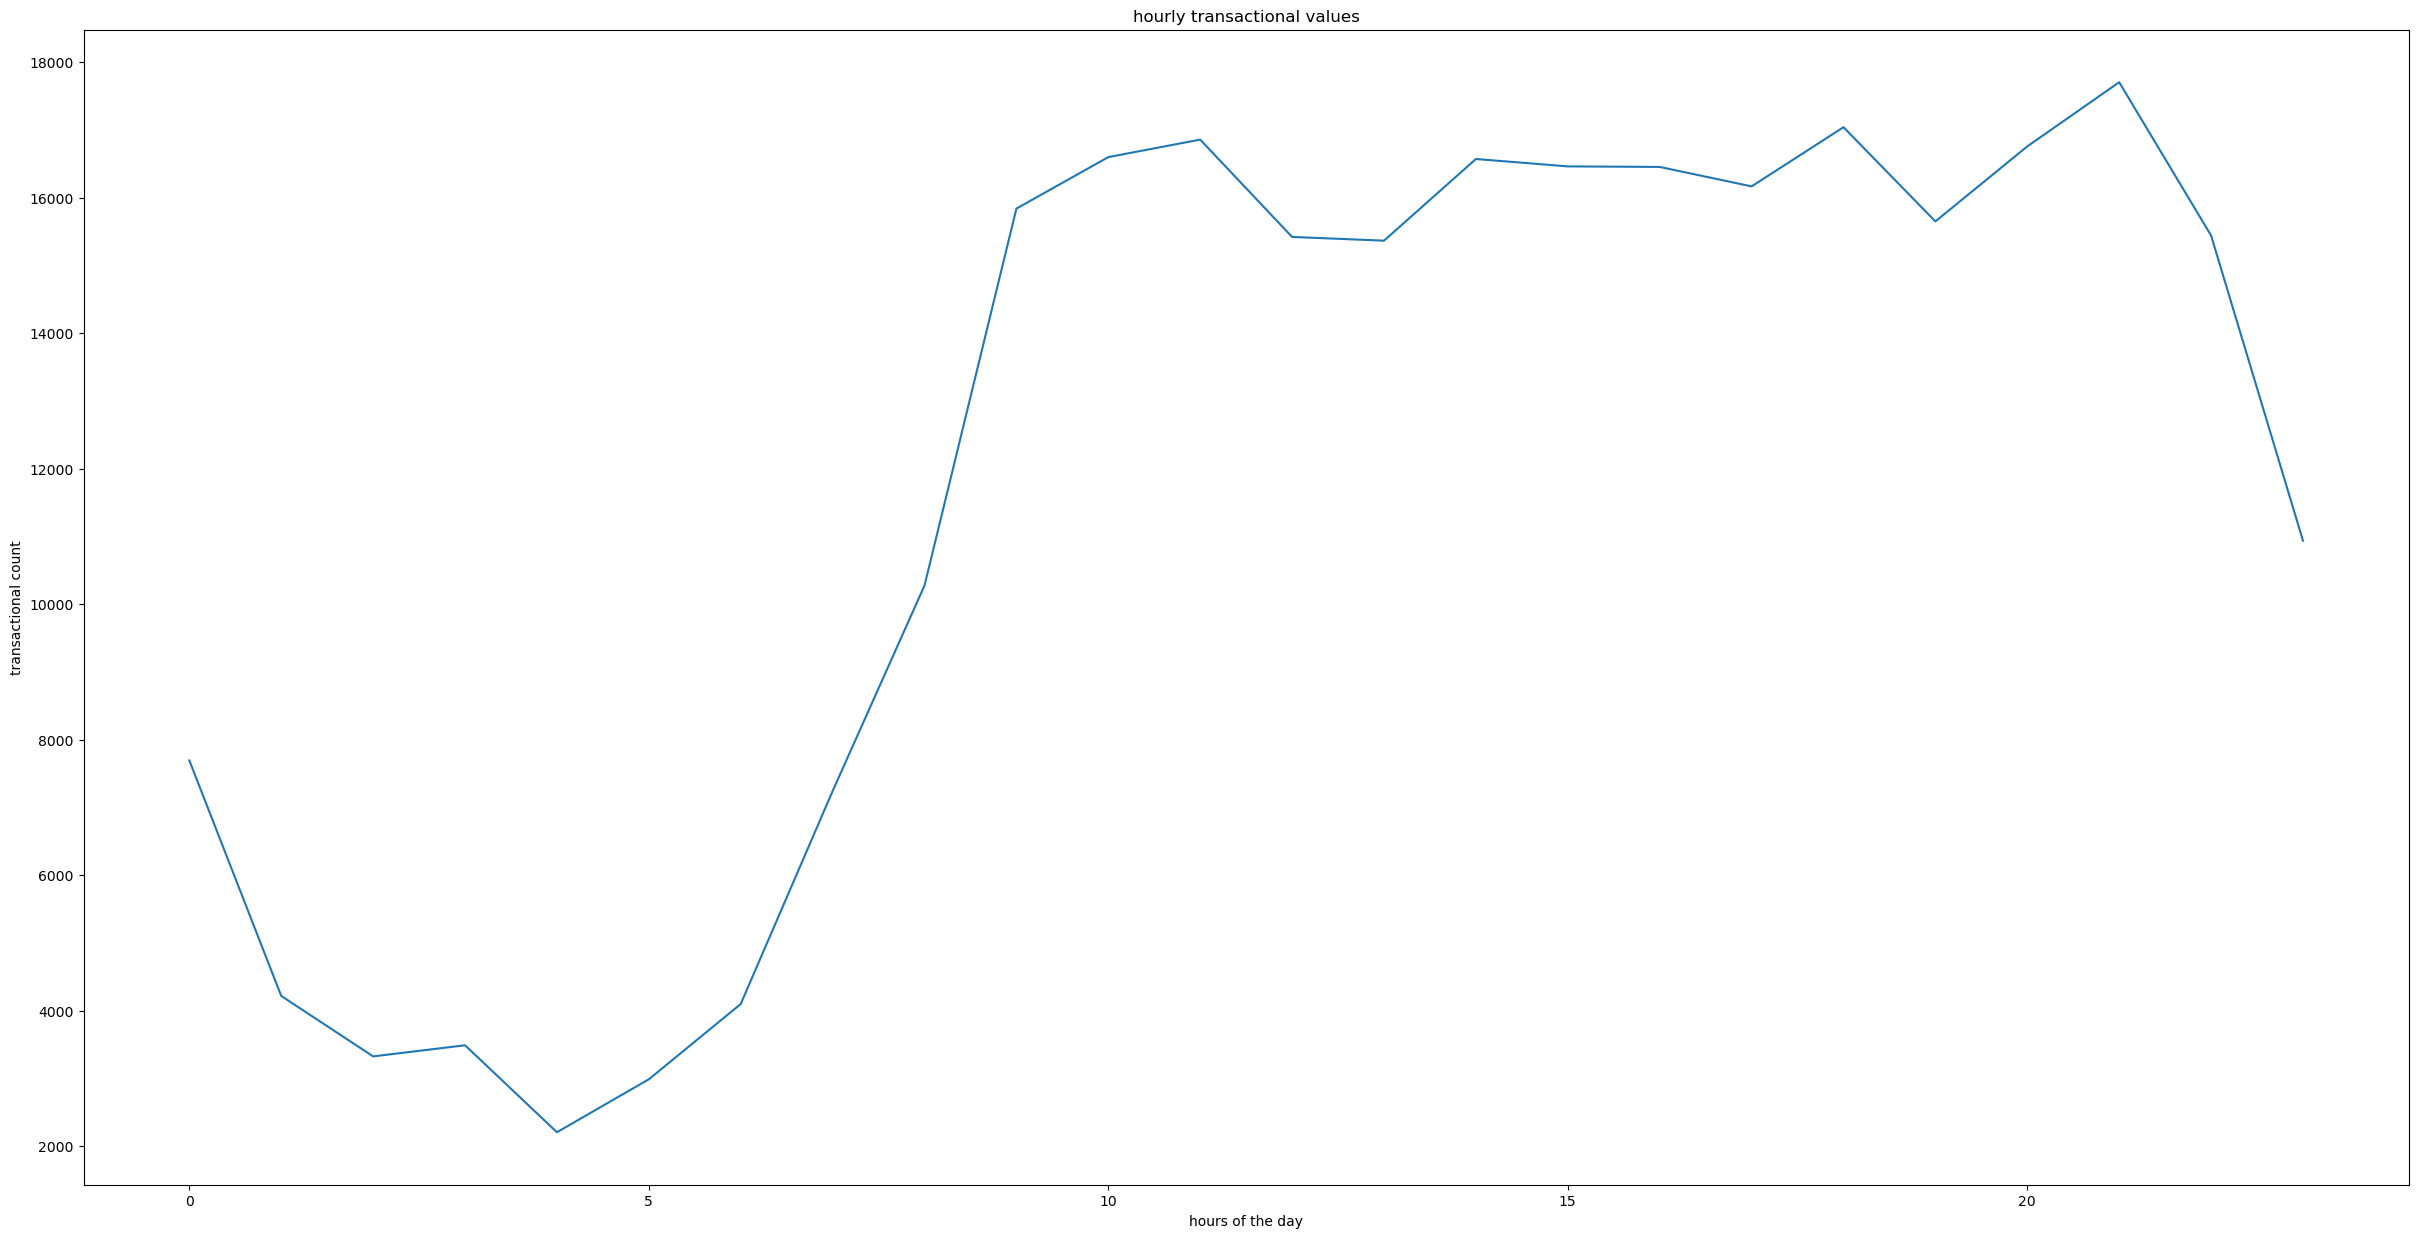

In [17]:
plt.figure(figsize=(30,15))
hourly_count=Lr.groupby('Hour')['Class'].count()
plt.plot(hourly_count.index,hourly_count.values)
plt.xlabel('hours of the day')
plt.ylabel('transactional count')
plt.title('hourly transactional values')
plt.show()

In [18]:
#create scaler instance 
scaler=StandardScaler()
Lr['Amount']=scaler.fit_transform(Lr['Amount'].values.reshape(-1,1))
Lr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0,0


In [19]:
x=Lr.drop('Class',axis=1)
y=Lr['Class']
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
119353,75420.0,-0.152487,-0.352665,1.433768,-2.193342,-1.145774,-0.695953,-0.358799,-0.010324,-1.561053,...,-0.180151,0.176101,-0.070661,0.322262,-0.410060,-0.346779,0.443171,0.234861,-0.345233,20
190379,128810.0,-0.022252,0.776875,-0.391513,-0.661675,1.903151,1.292022,0.623433,0.280478,-0.713997,...,0.388298,1.046072,-0.168998,3.115684,-0.161037,-0.168381,0.167509,0.206510,-0.335278,11
258213,158545.0,2.135745,-0.134012,-2.111410,0.196575,0.678221,-0.582152,0.366181,-0.256847,0.600580,...,-0.099302,-0.181852,0.028005,0.059763,0.253933,0.574167,-0.112035,-0.078503,-0.301454,20
22134,32055.0,0.302239,0.996394,-1.766323,1.778744,1.187872,-1.833564,0.836549,-0.166376,-0.699547,...,0.006518,-0.002899,0.352525,0.193802,-0.447776,-0.435363,0.214952,0.022662,-0.048655,8
58781,48544.0,-2.448556,-0.883610,0.732637,-2.191736,-1.318622,-0.907174,-0.596031,0.365238,-2.182886,...,-0.425251,-0.581924,0.220694,0.018934,-0.054356,-0.564615,-0.069636,-0.726593,-0.233287,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63540,50765.0,-0.170309,0.221997,2.116356,0.578457,-0.336103,0.643936,0.373917,-0.666240,-0.496522,...,-0.319372,0.163323,-0.394934,-0.458686,-0.215375,-0.083562,-0.668040,-0.525801,-0.205860,14
10861,18596.0,1.288060,-0.265346,0.700439,-0.711186,-0.708737,-0.293207,-0.641995,-0.086285,3.105257,...,-0.206909,-0.099874,-0.142307,-0.494329,0.597459,-0.674988,0.066342,0.022955,-0.305852,5
120844,75980.0,1.062508,0.620142,-0.094254,2.440131,0.482266,0.188827,0.132900,0.146943,-1.042247,...,0.020504,-0.047204,-0.124622,-0.409875,0.485527,0.066839,0.000108,0.032967,-0.201182,21
171081,120489.0,1.737996,-1.610554,-0.296375,-0.302290,-1.431117,0.062458,-1.066000,0.045455,0.260563,...,-0.244399,-0.551867,0.263425,0.653730,-0.746600,0.415846,-0.028939,0.005842,0.446348,9


In [21]:
y_train

119353    0
190379    0
258213    0
22134     0
58781     0
         ..
63540     0
10861     0
120844    0
171081    0
241182    0
Name: Class, Length: 227845, dtype: int64

In [22]:
print("Length of x_train id:{x_train}".format(x_train=len(x_train)))
print("Length of x_test id:{x_test}".format(x_test=len(x_test)))
print("length of y_train id:{y_train}".format(y_train=len(y_train)))
print("length of y_tes id:{y_test}".format(y_test=len(y_test)))

Length of x_train id:227845
Length of x_test id:56962
length of y_train id:227845
length of y_tes id:56962


In [23]:
y_train=np.array(y_train).reshape(-1)
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
df=LogisticRegression()
df.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=df.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.65      0.70      0.67       109

    accuracy                           1.00     56962
   macro avg       0.82      0.85      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
print(confusion_matrix(y_test,y_pred))

[[56812    41]
 [   33    76]]


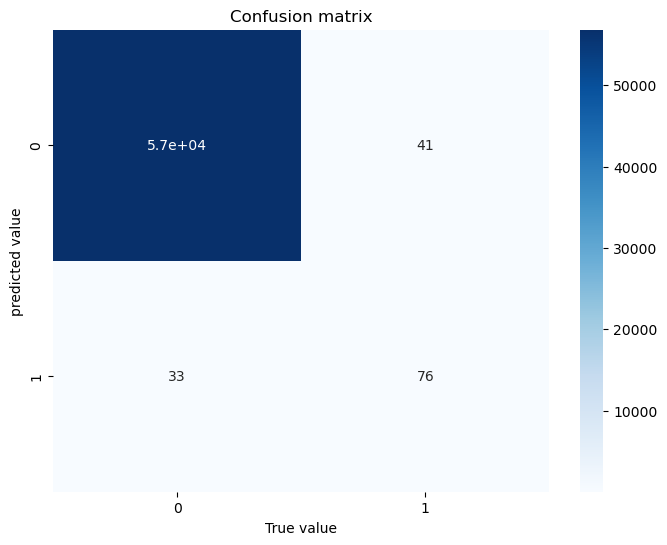

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel("True value")
plt.ylabel("predicted value")
plt.title("Confusion matrix")
plt.show()

Model optimization

In [30]:
from sklearn.model_selection import GridSearchCV
parameter={'C':[0.1,1,10]}
grid_search=GridSearchCV(df,parameter,cv=5)
grid_search.fit(x_train,y_train)
#get best Model
grid_search.best_estimator_

LogisticRegression(C=0.1)

In [31]:
#make prediction
y_pred=df.predict(x_test)
accuracy=df.score(x_test,y_test)
print("accuracy",accuracy)

accuracy 0.9987008883115059
